# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sys.path.append(os.getcwd() + '/refi')
import retirement_simulation as rs
import utils.constants
import utils.loaders

# Constants

In [4]:
initial_balance = 400000

initial_age = 30
initial_deferral = 55000
retirement_age = 60
retirement_consumption = 100000

initial_cpi = 275
retirement_ssb = 10000
benefits_age = 67
death_age = 100

asset_return_pctile = 25

glidepath = utils.constants.fidelity_glidepath

# Load Retirement Simulation Inputs

In [5]:
portfolio, deferral, consumption, inflation, cpi, ssb = utils.loaders.load_ret_sim_inputs(
    initial_age,
    retirement_age,
    death_age,
    benefits_age,
    asset_return_pctile,
    initial_cpi,
    initial_deferral,
    initial_balance,
    retirement_consumption,
    retirement_ssb,
    glidepath
)

In [6]:
eq_ret, bond_ret, cash_ret = [asset.static_value for asset in portfolio.assets]
inflation_rate = inflation.static_value

In [7]:
print('Equity geometric mean return: {0:.4f}%'.format(100 * eq_ret))
print('Bonds geometric mean return: {0:.4f}%'.format(100 * bond_ret))
print('Cash geometric mean return: {0:.4f}%'.format(100 * cash_ret))
print('Inflation geometric mean rate: {0:.4f}%'.format(100 * inflation_rate))

Equity geometric mean return: 9.3375%
Bonds geometric mean return: 3.4093%
Cash geometric mean return: 2.6567%
Inflation geometric mean rate: 3.1000%


# Retirement Simulation

In [8]:
retirement_simulation = rs.RetirementSimulation(
    initial_age=initial_age,
    retirement_age=retirement_age,
    death_age=death_age,
    portfolio=portfolio,
    deferral_scenario=deferral,
    consumption_scenario=consumption,
    inflation_scenario=inflation,
    cpi_scenario=cpi,
    ssb_scenario=ssb)

In [9]:
retirement_simulation.simulate()

# Output

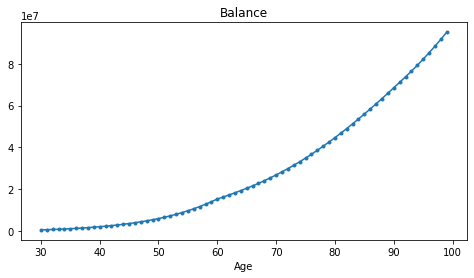

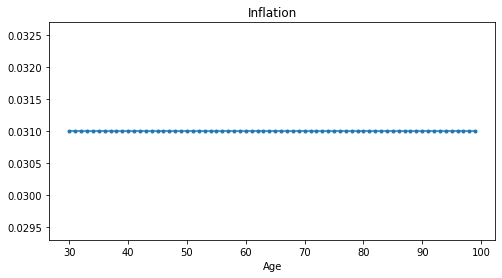

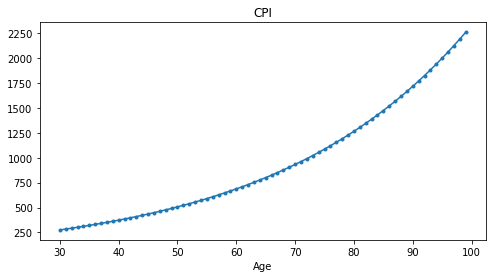

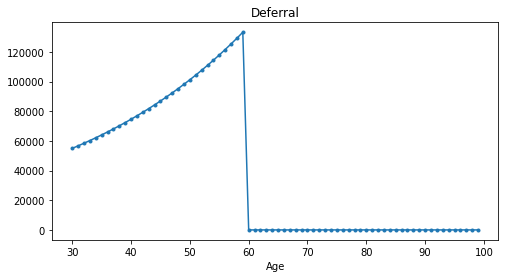

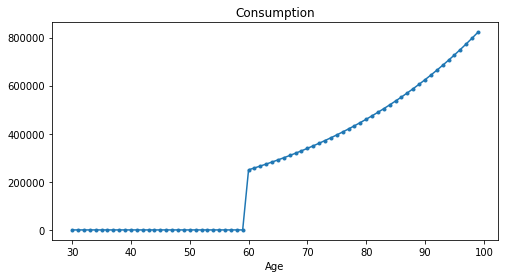

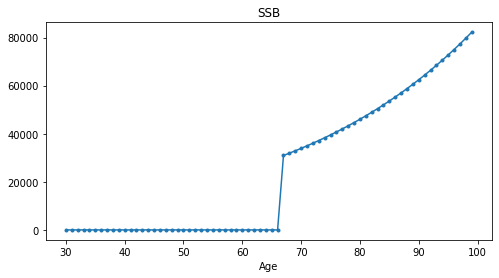

In [10]:
retirement_simulation.plot()